## import Libraries

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## read data

In [2]:
df=pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## check null

In [4]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
df['rm']=df['rm'].fillna(df['rm'].mean())

In [6]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


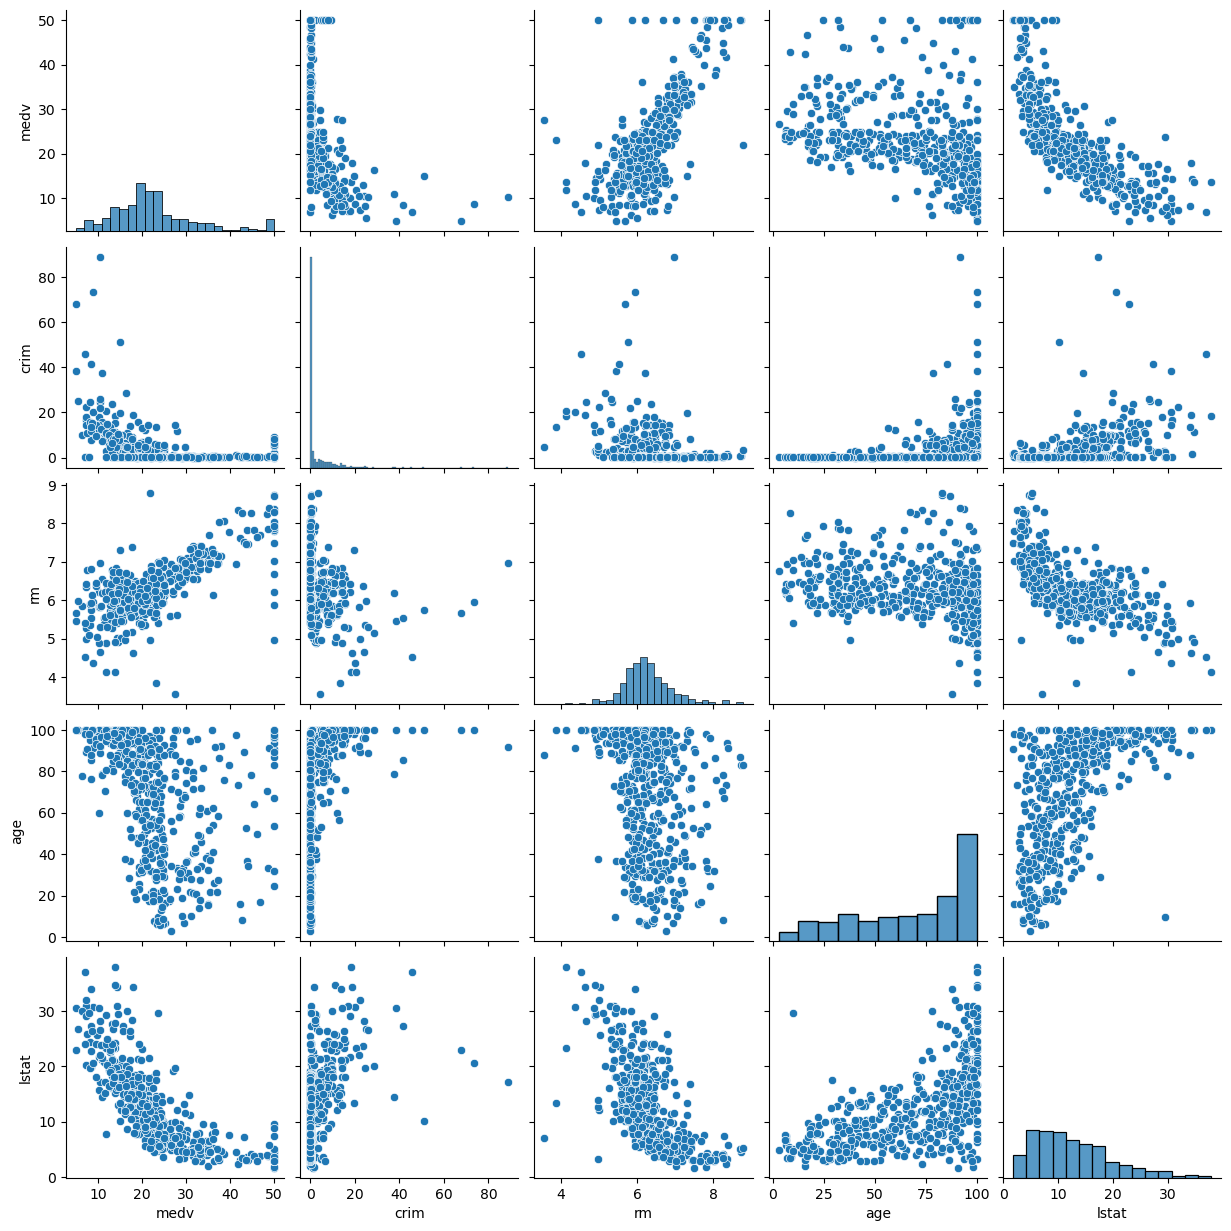

In [9]:
sns.pairplot(df[['medv', 'crim', 'rm', 'age', 'lstat']])
plt.show()

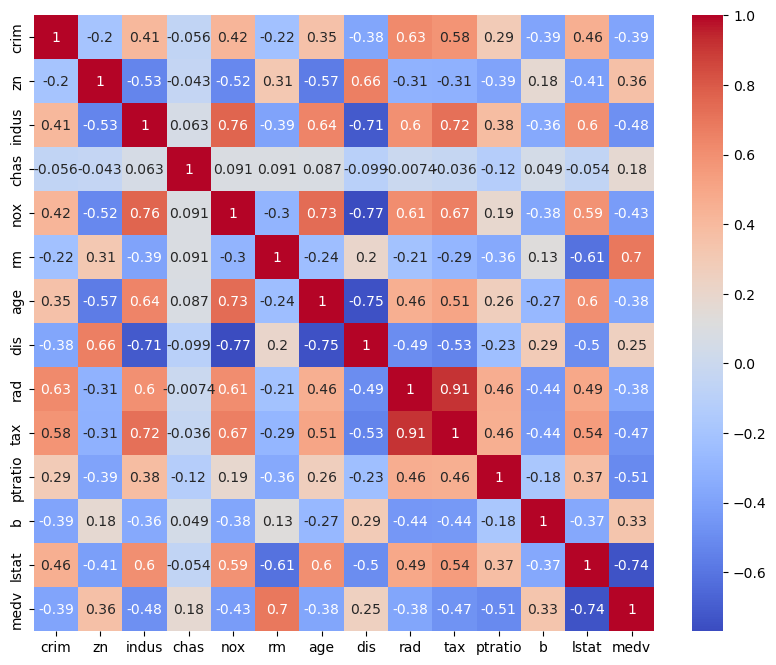

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

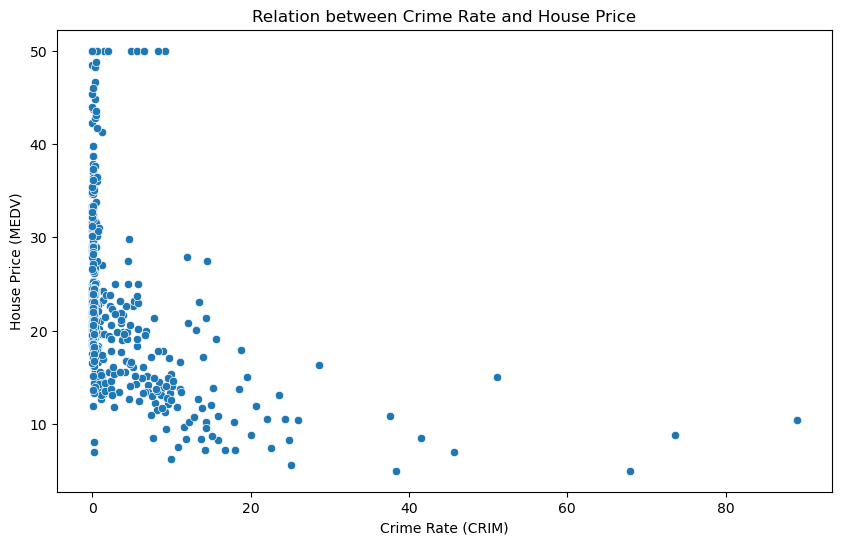

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='crim', y='medv', data=df)
plt.title('Relation between Crime Rate and House Price')
plt.xlabel('Crime Rate (CRIM)')
plt.ylabel('House Price (MEDV)')
plt.show()

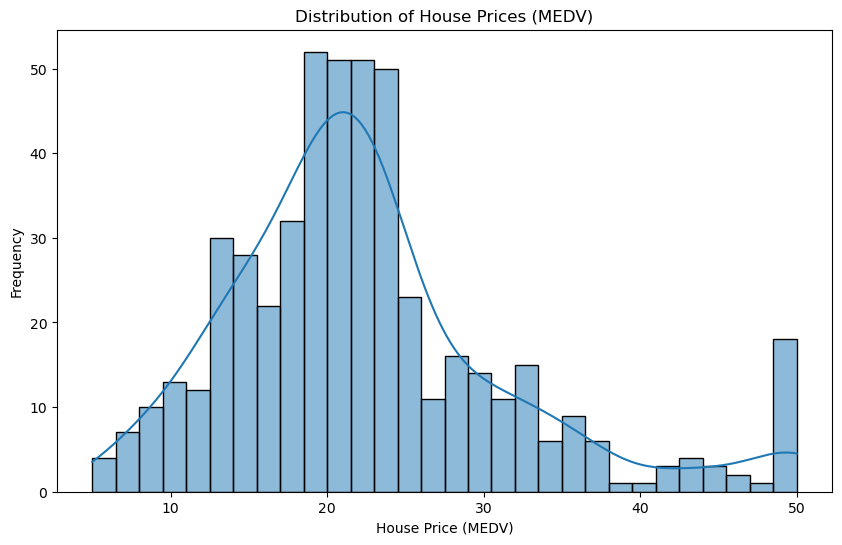

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['medv'], kde=True, bins=30)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('House Price (MEDV)')
plt.ylabel('Frequency')
plt.show()

## split data

In [13]:
x = df.drop('medv', axis=1)  # كل الميزات ما عدا السعر (medv)
y = df['medv']  # الهدف (سعر المنزل)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## build model(linear by poly) 

In [15]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [16]:
Lr=LinearRegression()
Lr.fit(x_train_poly,y_train)
y_pred_poly=Lr.predict(x_test_poly)

In [17]:
mse=mean_squared_error(y_test,y_pred_poly)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_poly)
r2_poly=r2_score(y_test,y_pred_poly)

In [18]:
print(f'mse ={mse}')
print(f'rmse ={rmse}')
print(f'maa ={mae}')
print(f'r2 ={r2_poly}')

mse =14.782913116450022
rmse =3.844855409043365
maa =2.674576157097722
r2 =0.798416057656108


## build model(RandomForestRegressor) 

In [19]:
from sklearn.ensemble import RandomForestRegressor

# إنشاء نموذج Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# تدريب النموذج
model_rf.fit(x_train, y_train)

# التنبؤ باستخدام بيانات الاختبار
y_pred_rf = model_rf.predict(x_test)

# تقييم النموذج
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest = RMSE: {rmse_rf}")
print(f"Random Forest = R²: {r2_rf}")


Random Forest = RMSE: 2.8287689676870085
Random Forest = R²: 0.890883389241557


In [20]:
from sklearn.model_selection import cross_val_score

# استخدام Cross-validation لتقييم Random Forest
cv_scores_rf = cross_val_score(model_rf, x, y, cv=5, scoring='neg_mean_squared_error')

# حساب المتوسط والانحراف المعياري
mean_cv_score_rf = cv_scores_rf.mean()
std_cv_score_rf = cv_scores_rf.std()

# تحويل القيمة السلبية للـ MSE إلى RMSE
mean_cv_rmse_rf = (-mean_cv_score_rf) ** 0.5

print(f"Random Forest Cross-Validation - Mean RMSE: {mean_cv_rmse_rf}")
print(f"Random Forest Cross-Validation - Standard Deviation: {std_cv_score_rf}")


Random Forest Cross-Validation - Mean RMSE: 4.610226319750108
Random Forest Cross-Validation - Standard Deviation: 13.172526650795849


## comparison_values

In [21]:
# التنبؤ باستخدام النموذج الأفضل (إذا كان Random Forest)
final_predictions = model_rf.predict(x_test)

# عرض بعض النتائج
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions})
print(predictions_df.head())


     Actual  Predicted
173    23.6     22.895
274    32.4     30.835
491    13.6     16.596
72     22.8     23.634
452    16.1     16.879


## visualization

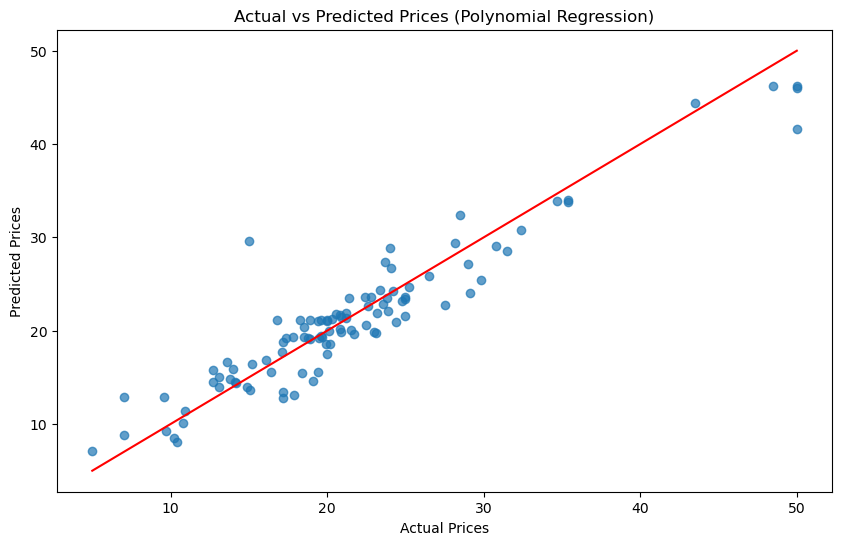

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Polynomial Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

## comparison (poly vs model_rf)

In [23]:
models=['poly','model_rf']

In [24]:
models_score=[r2_poly,r2_rf]

<Axes: >

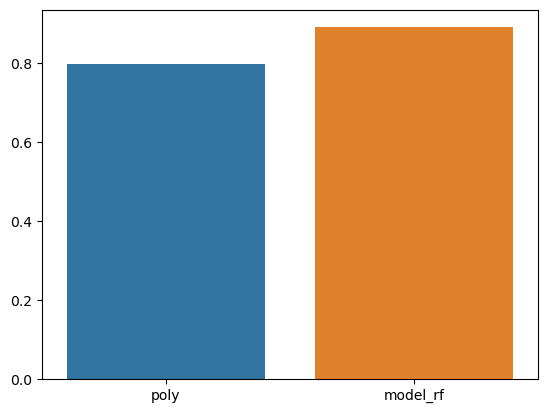

In [25]:
sns.barplot(x=models,y=models_score)